In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings(action='ignore')
sns.set()

In [36]:
df = pd.read_csv('nyc_taxi_trip_duration.csv')

In [37]:
df.shape

(729322, 11)

In [38]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [40]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [41]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [42]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [43]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [44]:
non_num_cols=['id','pickup_datetime','dropoff_datetime','store_and_fwd_flag']
print(df[non_num_cols].count())

id                    729322
pickup_datetime       729322
dropoff_datetime      729322
store_and_fwd_flag    729322
dtype: int64


In [45]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [46]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

In [47]:
df['pickup_day'].value_counts()

Friday       111744
Saturday     110252
Thursday     109344
Wednesday    105074
Tuesday      101254
Sunday        97682
Monday        93972
Name: pickup_day, dtype: int64

In [48]:
df['dropoff_day'].value_counts()

Friday       111509
Saturday     110289
Thursday     108918
Wednesday    104944
Tuesday      101142
Sunday        98561
Monday        93959
Name: dropoff_day, dtype: int64

In [49]:
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
df['pickup_timezone']=df['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

In [50]:
print( df['trip_duration'].nlargest(10))

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
90557       86369
673847      86369
163178      86367
179065      86365
248675      86364
Name: trip_duration, dtype: int64


In [51]:
df=df[df.trip_duration!=df.trip_duration.max()]

In [52]:
print( df['trip_duration'].nlargest(10))

259437    86391
119185    86387
177225    86378
496391    86377
90557     86369
673847    86369
163178    86367
179065    86365
248675    86364
680575    86363
Name: trip_duration, dtype: int64


In [53]:
bins=np.array([0,1800,3600,5400,7200,90000])
df['duration_time']=pd.cut(df.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

In [54]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_timezone,dropoff_timezone,duration_time
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,evening,evening,< 5
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,late night,late night,< 5
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,evening,evening,< 5
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Tuesday,morning,midday,< 5
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday,morning,morning,< 5


In [55]:
df['trip_duration'].nlargest(5)

259437    86391
119185    86387
177225    86378
496391    86377
90557     86369
Name: trip_duration, dtype: int64

In [56]:
len(df[df['trip_duration']==1])

13

In [57]:
df=df[df['trip_duration']!=df['trip_duration'].min()]

In [58]:
len(df[df['trip_duration']==1])

0

In [59]:
df['trip_duration'].nsmallest(10)

3169     2
20225    2
43683    2
47266    2
52233    2
62589    2
69490    2
79486    2
81585    2
83915    2
Name: trip_duration, dtype: int64

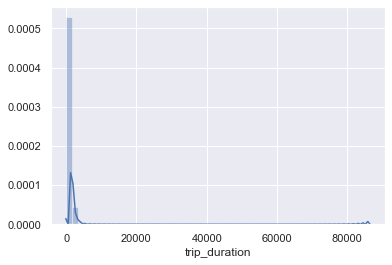

In [60]:
sns.distplot(df['trip_duration'])

In [61]:
df['trip_duration_hour']=df['trip_duration']/3600

In [62]:
df['trip_duration_hour'].describe()

count    729308.000000
mean          0.263774
std           0.868763
min           0.000556
25%           0.110278
50%           0.184167
75%           0.298611
max          23.997500
Name: trip_duration_hour, dtype: float64

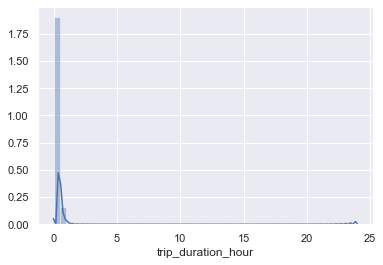

In [63]:
sns.distplot(df['trip_duration_hour'])

In [64]:
df=df[df['passenger_count']<=6]
df=df[df['passenger_count']!=0]

In [65]:
df['passenger_count'].value_counts()

1    517403
2    105096
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

In [67]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_day                    object
dropoff_day                   object
pickup_timezone               object
dropoff_timezone              object
duration_time               category
trip_duration_hour           float64
dtype: object

In [68]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

In [69]:
df['pickup_month'].value_counts()

3    128307
4    125627
5    124194
2    119354
6    117404
1    114388
Name: pickup_month, dtype: int64

In [70]:
df['dropoff_month'].value_counts()

3    128275
4    125626
5    124229
2    119351
6    117378
1    114362
7        53
Name: dropoff_month, dtype: int64

In [72]:
print(df[df['dropoff_month']==7]['pickup_datetime'].dt.month.value_counts())
print(df[df.dropoff_month==7].pickup_datetime.dt.day.value_counts())

6    53
Name: pickup_datetime, dtype: int64
30    53
Name: pickup_datetime, dtype: int64


In [73]:
#a function is created to calculate the distance from latitudes and longitudes
from math import radians, cos, sin, asin, sqrt
def haversine(df):
    lat1, lon1, lat2, lon2 = df.pickup_latitude,df.pickup_longitude,df.dropoff_latitude,df.dropoff_longitude 
    R = 3959.87433 # this is in miles.  For Earth radius in kilometers use 6372.8 km
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    return R * c

In [74]:
df['distance'] = df.apply(lambda x: haversine(x), axis=1)

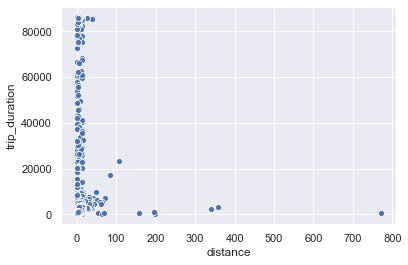

In [75]:
sns.scatterplot(x='distance',y='trip_duration',data=df)

In [76]:
len(df[df['distance']==0])

2889

In [77]:
mean_dist = df['distance'].mean()
mean_dist

2.138898403752463

In [78]:
df.loc[df['distance']==0,'distance']=mean_dist

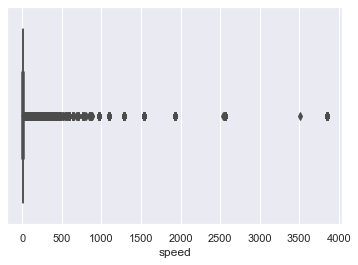

In [80]:
df['speed']=df['distance']/df['trip_duration_hour']
sns.boxplot(df['speed'])

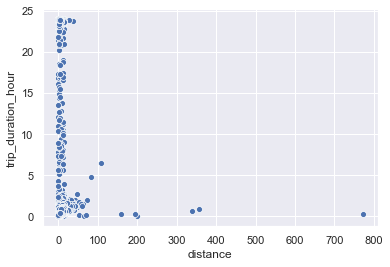

In [81]:
sns.scatterplot(x='distance',y='trip_duration_hour',data=df)

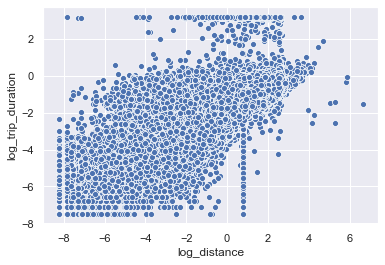

In [83]:
df['log_distance']=np.log(df['distance'])
df['log_trip_duration']=np.log(df['trip_duration_hour'])
sns.scatterplot(x='log_distance',y='log_trip_duration',data=df)

In [84]:
df=df[df.log_trip_duration<2]

In [85]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_timezone',
       'dropoff_timezone', 'duration_time', 'trip_duration_hour',
       'pickup_month', 'dropoff_month', 'distance', 'speed', 'log_distance',
       'log_trip_duration'],
      dtype='object')

In [93]:
data2=df.loc[:,['passenger_count','store_and_fwd_flag','trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
   'dropoff_month','pickup_timezone','dropoff_timezone','speed','log_distance','distance']]

In [94]:
data2.dtypes

passenger_count         int64
store_and_fwd_flag     object
trip_duration           int64
pickup_day             object
dropoff_day            object
pickup_month            int64
dropoff_month           int64
pickup_timezone        object
dropoff_timezone       object
speed                 float64
log_distance          float64
distance              float64
dtype: object

In [95]:
data2.head()

,passenger_count,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_timezone,dropoff_timezone,speed,log_distance,distance
0,1,N,400,Monday,Monday,2,2,evening,evening,6.707517,-0.293996,0.745280
1,2,N,1100,Friday,Friday,3,3,late night,late night,8.399243,0.942518,2.566436
2,2,N,1635,Sunday,Sunday,2,2,evening,evening,9.922969,1.505561,4.506682
3,6,N,1141,Tuesday,Tuesday,1,1,morning,midday,4.630251,0.383582,1.467532
4,1,N,848,Wednesday,Wednesday,2,2,morning,morning,11.421451,0.989685,2.690386


In [96]:
data2=pd.get_dummies(data2,columns=['store_and_fwd_flag','pickup_day','dropoff_day','pickup_month','dropoff_month','pickup_timezone', 'dropoff_timezone'])

In [97]:
data2.dtypes

passenger_count                  int64
trip_duration                    int64
speed                          float64
log_distance                   float64
distance                       float64
store_and_fwd_flag_N             uint8
store_and_fwd_flag_Y             uint8
pickup_day_Friday                uint8
pickup_day_Monday                uint8
pickup_day_Saturday              uint8
pickup_day_Sunday                uint8
pickup_day_Thursday              uint8
pickup_day_Tuesday               uint8
pickup_day_Wednesday             uint8
dropoff_day_Friday               uint8
dropoff_day_Monday               uint8
dropoff_day_Saturday             uint8
dropoff_day_Sunday               uint8
dropoff_day_Thursday             uint8
dropoff_day_Tuesday              uint8
dropoff_day_Wednesday            uint8
pickup_month_1                   uint8
pickup_month_2                   uint8
pickup_month_3                   uint8
pickup_month_4                   uint8
pickup_month_5           

In [98]:
data2.corr()

,passenger_count,trip_duration,speed,log_distance,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_day_Friday,pickup_day_Monday,pickup_day_Saturday,...,dropoff_month_6,dropoff_month_7,pickup_timezone_evening,pickup_timezone_late night,pickup_timezone_midday,pickup_timezone_morning,dropoff_timezone_evening,dropoff_timezone_late night,dropoff_timezone_midday,dropoff_timezone_morning
passenger_count,1.000000,0.014740,-0.008751,0.012491,0.009251,0.020851,-0.020851,-0.001782,-0.008850,0.022535,...,-0.002544,-0.002357,0.005493,0.013977,0.001713,-0.023606,0.005482,0.013958,0.001237,-0.023739
trip_duration,0.014740,1.000000,-0.023743,0.694821,0.686604,-0.028826,0.028826,0.020540,-0.015985,-0.037556,...,0.036654,0.009244,0.006519,-0.045566,0.063581,-0.036084,0.026822,-0.030186,0.044705,-0.055442
speed,-0.008751,-0.023743,1.000000,0.068430,0.098527,-0.005297,0.005297,-0.003565,0.004753,0.002098,...,-0.000439,-0.000043,-0.007326,0.018189,-0.017177,0.010484,-0.008721,0.017601,-0.017194,0.012743
log_distance,0.012491,0.694821,0.068430,1.000000,0.733820,-0.019235,0.019235,-0.004225,0.003985,-0.001203,...,0.011516,0.007566,-0.013502,0.083495,-0.056467,-0.003673,-0.012942,0.095499,-0.065377,-0.008485
distance,0.009251,0.686604,0.098527,0.733820,1.000000,-0.028315,0.028315,-0.003537,0.010763,-0.010145,...,0.009831,0.006322,-0.015959,0.054260,-0.033905,0.003221,-0.010799,0.065187,-0.047066,-0.000327
store_and_fwd_flag_N,0.020851,-0.028826,-0.005297,-0.019235,-0.028315,1.000000,-1.000000,-0.002791,-0.000582,0.002956,...,-0.001662,0.000600,-0.000803,0.003119,-0.004264,0.002810,-0.002380,0.002758,-0.002822,0.003439
store_and_fwd_flag_Y,-0.020851,0.028826,0.005297,0.019235,0.028315,-1.000000,1.000000,0.002791,0.000582,-0.002956,...,0.001662,-0.000600,0.000803,-0.003119,0.004264,-0.002810,0.002380,-0.002758,0.002822,-0.003439
pickup_day_Friday,-0.001782,0.020540,-0.003565,-0.004225,-0.003537,-0.002791,0.002791,1.000000,-0.163612,-0.179471,...,-0.014784,-0.003417,-0.008407,0.015827,-0.017049,0.014164,-0.007886,0.015578,-0.017032,0.013699
pickup_day_Monday,-0.008850,-0.015985,0.004753,0.003985,0.010763,-0.000582,0.000582,-0.163612,1.000000,-0.162301,...,-0.008798,-0.003090,0.020313,-0.055803,0.004904,0.027631,0.020673,-0.053801,0.006374,0.024857
pickup_day_Saturday,0.022535,-0.037556,0.002098,-0.001203,-0.010145,0.002956,-0.002956,-0.179471,-0.162301,1.000000,...,-0.014666,-0.003390,-0.017361,0.085197,-0.001993,-0.065745,-0.017917,0.080426,-0.004232,-0.060095


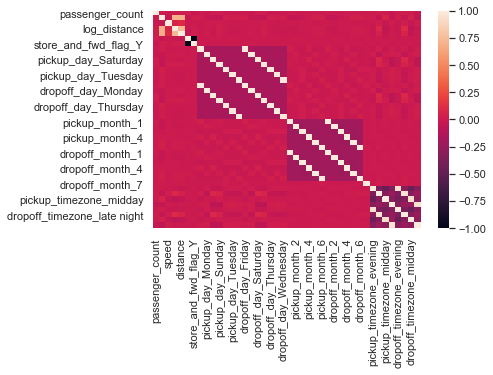

In [99]:
sns.heatmap(data2.corr())

In [100]:
base_line_col=['distance']
predictor_cols=['passenger_count','distance','store_and_fwd_flag_N','store_and_fwd_flag_Y',
               'pickup_day_Friday','pickup_day_Monday','pickup_day_Saturday','pickup_day_Sunday',
               'pickup_day_Thursday','pickup_day_Tuesday','pickup_day_Wednesday','dropoff_day_Friday',
               'dropoff_day_Monday','dropoff_day_Saturday','dropoff_day_Sunday','dropoff_day_Thursday',
               'dropoff_day_Tuesday','dropoff_day_Wednesday','pickup_month_1','pickup_month_5','pickup_month_6',
               'dropoff_month_1','dropoff_month_5','dropoff_month_6','pickup_timezone_late night',
               'pickup_timezone_midday','pickup_timezone_morning','dropoff_timezone_evening',
               'dropoff_timezone_late night','dropoff_timezone_midday','dropoff_timezone_morning']
target_col=['trip_duration']

In [101]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
def modelfit(estimator,data_train,data_test,predictors,target):
    estimator.fit(data_train[predictors], data_train.loc[:,target])
    train_pred=estimator.predict(data_train[predictors])
    cv_score=cross_val_score(estimator,data_train[predictors],data_train.loc[:,target],cv=20,scoring='neg_mean_squared_error')
    
    cv_score=np.sqrt(np.abs(cv_score))
    #Print model report:
    print ("\nModel Report")
    print ("RMSE on Train Data: %.4g" % np.sqrt(metrics.mean_squared_error(data_train.loc[:,target].values, train_pred)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    test_pred=estimator.predict(data_test[predictors])
    print ("RMSE on Test Data: %.4g" % np.sqrt(metrics.mean_squared_error(data_test.loc[:,target].values, test_pred)))
    
    
    
    return test_pred

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
validation_size = 0.20
seed = 7
X_train, X_test = train_test_split(data2,test_size=validation_size, random_state=seed)

In [103]:
mean_pred=np.repeat(X_train[target_col].mean(),len(X_test[target_col]))
from sklearn.metrics import mean_squared_error as mae
sqrt(mae(X_test[target_col],mean_pred))

664.1583834380903

In [104]:
alg1 = LinearRegression(normalize=True)
print('The baseline model')
y_pred=modelfit(alg1, X_train, X_test,base_line_col,target_col)
coef1 = alg1.coef_
print('The coeffient is {}'.format(coef1))

The baseline model

Model Report
RMSE on Train Data: 463
CV Score : Mean - 461.4 | Std - 47.83 | Min - 420.1 | Max - 592.6
RMSE on Test Data: 577.6
The coeffient is [[187.78103658]]



Model Report
RMSE on Train Data: 448.7
CV Score : Mean - 447 | Std - 49.5 | Min - 404.9 | Max - 582.4
RMSE on Test Data: 567.3


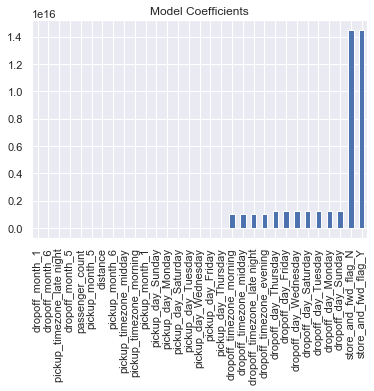

In [105]:
alg2 = LinearRegression(normalize=True)
y_pred=modelfit(alg2, X_train, X_test, predictor_cols,target_col)
coef1 = pd.Series(alg2.coef_[0], predictor_cols).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')